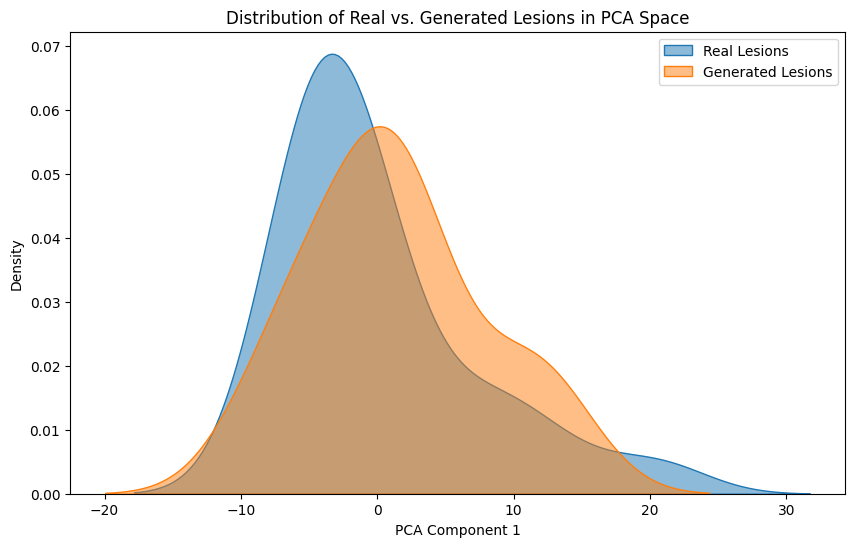

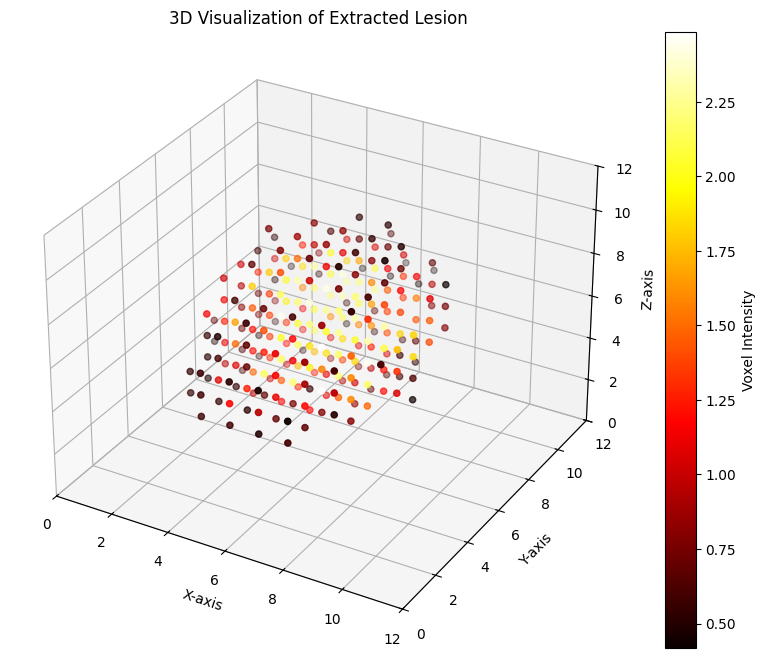

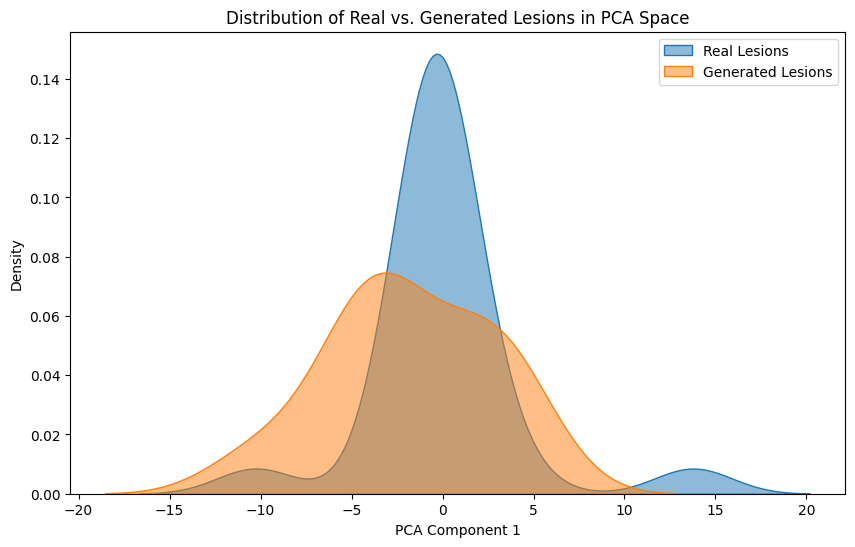

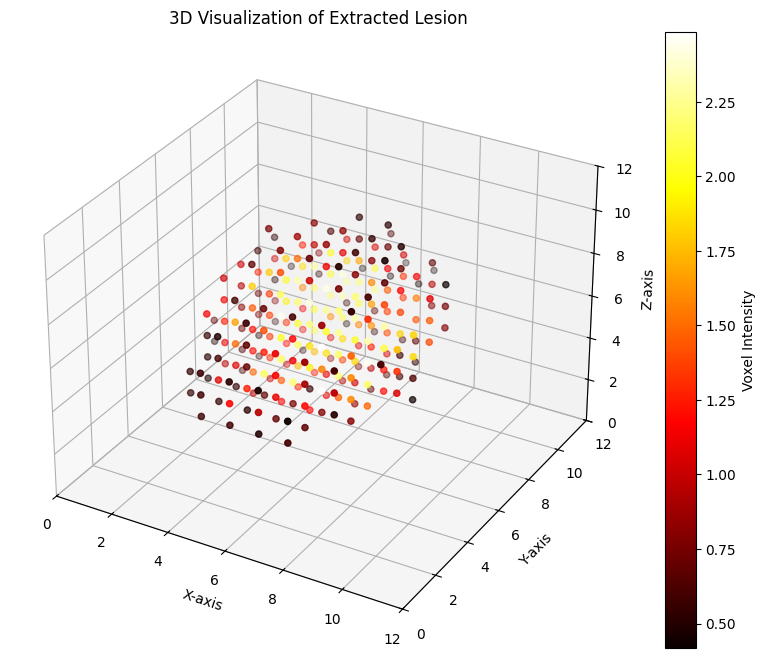

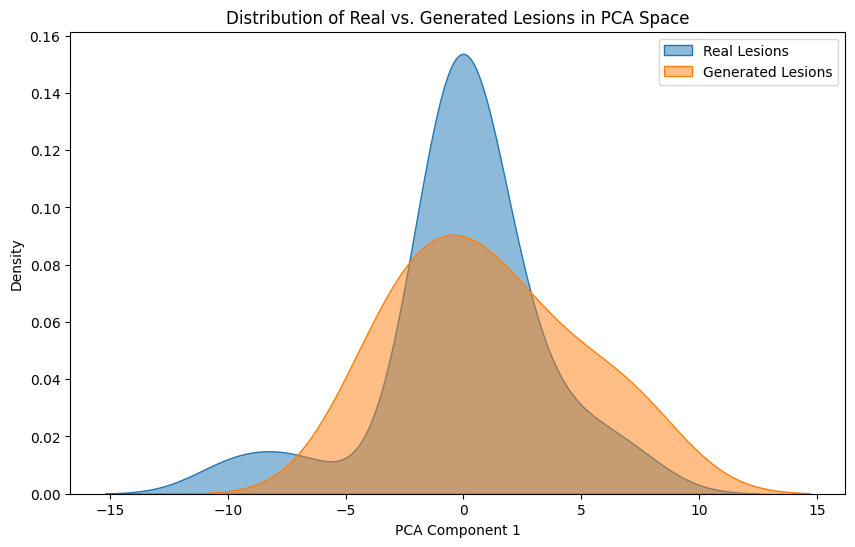

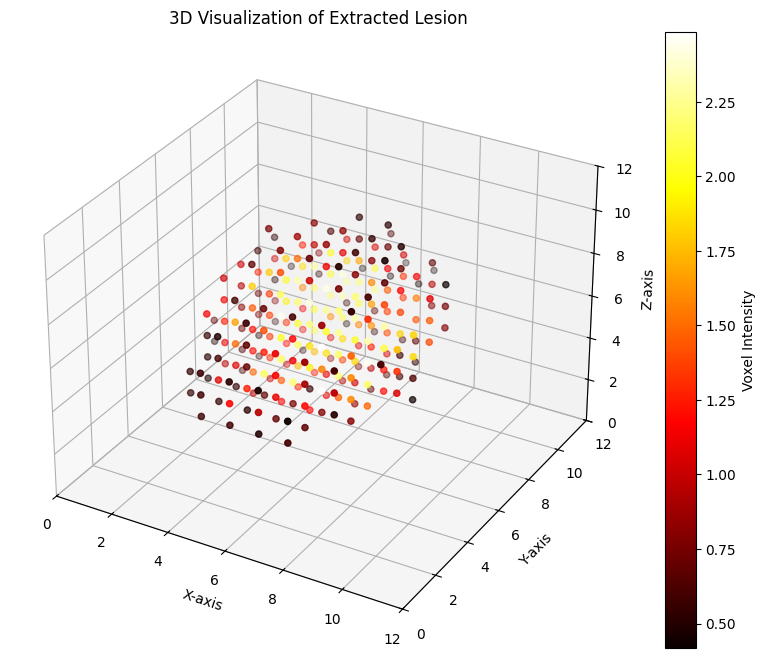

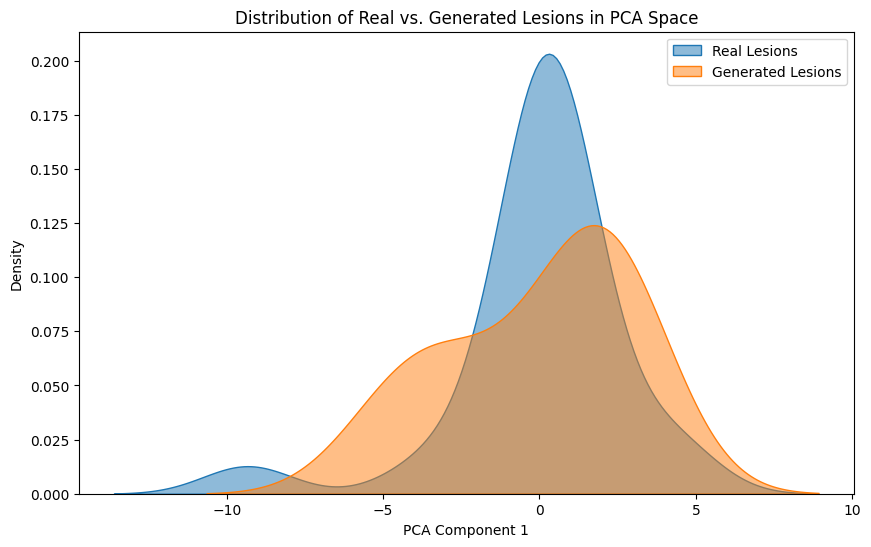

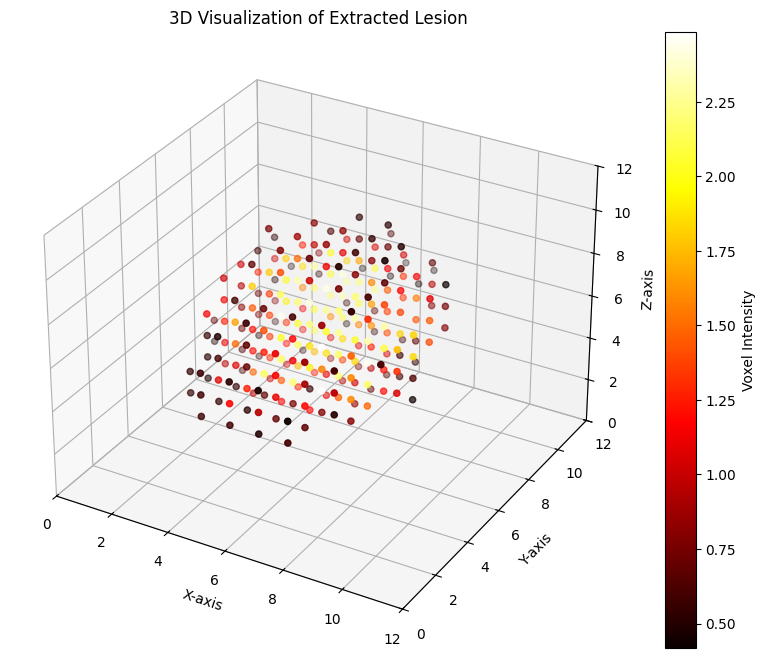

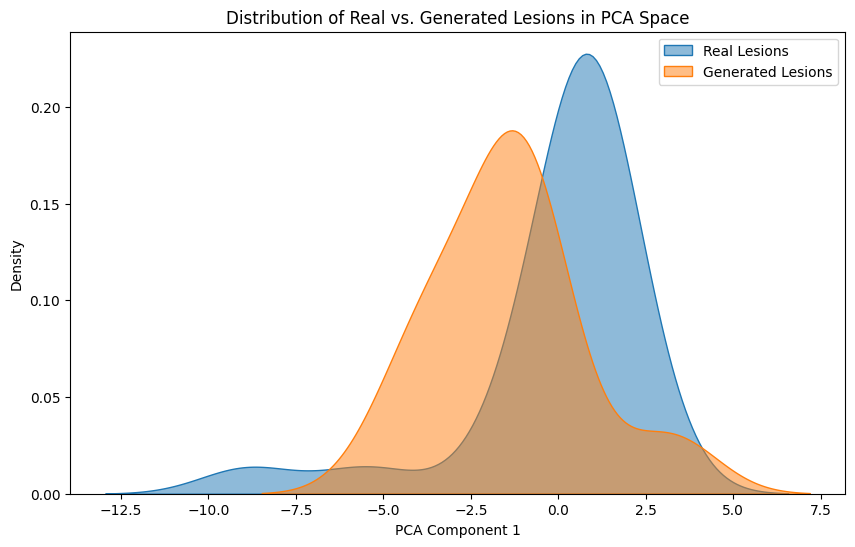

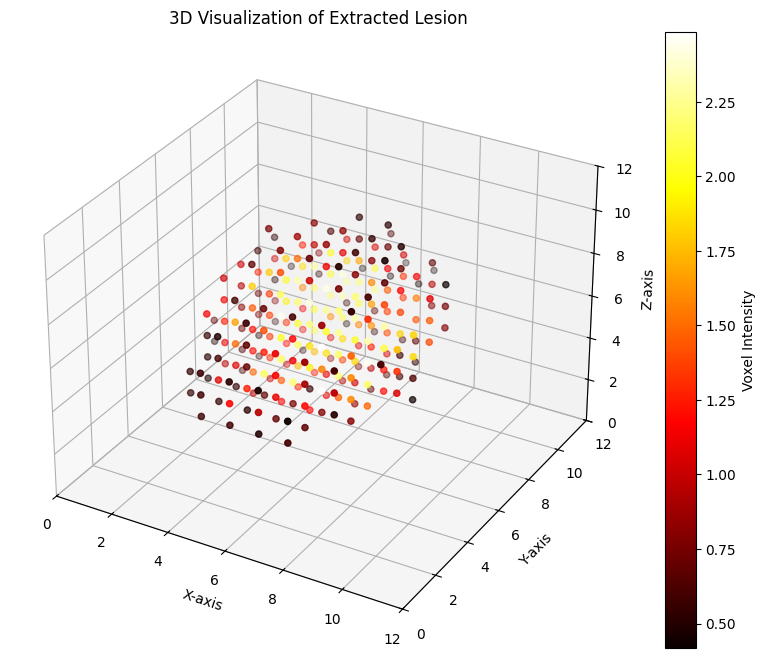

In [2]:
# 9. Validate mock lesion PCA distribution compared to original
# =================================================================================

import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Load PCA model and real lesion features
pca_model_path = '//cifs.research.erasmusmc.nl/nuge0001/MartijnB/pca_model_real_lesions.joblib'
pca_features_path = '//cifs.research.erasmusmc.nl/nuge0001/MartijnB/pca_features_real_lesions.joblib'
pca = joblib.load(pca_model_path)
real_pca_features = joblib.load(pca_features_path)  # Shape: (num_lesions, num_pca_components)

def plot_lesion_3d(lesion_array):
    """ Plot the extracted lesion in 3D with a colorbar. """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    nonzero_voxels = np.argwhere(lesion_array > 0)
    values = lesion_array[lesion_array > 0]
    
    sc = ax.scatter(nonzero_voxels[:, 0], nonzero_voxels[:, 1], nonzero_voxels[:, 2], 
                    c=values, cmap='hot', marker='o')
    ax.set_title('3D Visualization of Extracted Lesion')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 12)
    ax.set_zlim(0, 12)
    fig.colorbar(sc, ax=ax, label='Voxel Intensity')
    plt.show()

# Function to generate mock lesions by sampling from PCA space
def generate_mock_lesions(n=1000):
    """
    Generates n synthetic lesions by sampling from the PCA distribution.
    Returns: mock_lesion_features (n, num_pca_components)
    """
    mean = np.mean(real_pca_features, axis=0)
    cov = np.cov(real_pca_features, rowvar=False)  # Covariance of real lesion PCA features
    sampled_pca_features = np.random.multivariate_normal(mean, cov, size=n)
    
    return sampled_pca_features

# Generate 1000 synthetic lesions in PCA space
mock_pca_features = generate_mock_lesions(n=10)
for i in range(5):
    # Compare distributions of PCA components
    plt.figure(figsize=(10, 6))
    sns.kdeplot(real_pca_features[:, i], label='Real Lesions', fill=True, alpha=0.5)
    sns.kdeplot(mock_pca_features[:, i], label='Generated Lesions', fill=True, alpha=0.5)
    plt.xlabel("PCA Component 1")
    plt.ylabel("Density")
    plt.title("Distribution of Real vs. Generated Lesions in PCA Space")
    plt.legend()
    plt.show()

    # Reconstruct a sample lesion from PCA space
    sample_mock_lesion = pca.inverse_transform(mock_pca_features[0])  # First generated lesion
    sample_mock_lesion = sample_mock_lesion.reshape((12, 12, 12))  # Reshape back into 3D
    sample_mock_lesion[sample_mock_lesion < 0.4] = 0  # Threshold for reconstruction artifacts

    # Plot the 3D reconstruction of the synthetic lesion
    plot_lesion_3d(sample_mock_lesion)


Real lesions: 22, Synthetic lesions: 76


C:\Users\r106186\AppData\Local\Temp\2\ipykernel_6404\2379265779.py:455: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(real_features[:, feature_idx], label="Real", ax=ax, fill=True, color="blue", alpha=0.5)
C:\Users\r106186\AppData\Local\Temp\2\ipykernel_6404\2379265779.py:456: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(synthetic_features[:, feature_idx], label="Synthetic", ax=ax, fill=True, color="red", alpha=0.5)
C:\Users\r106186\AppData\Local\Temp\2\ipykernel_6404\2379265779.py:458: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


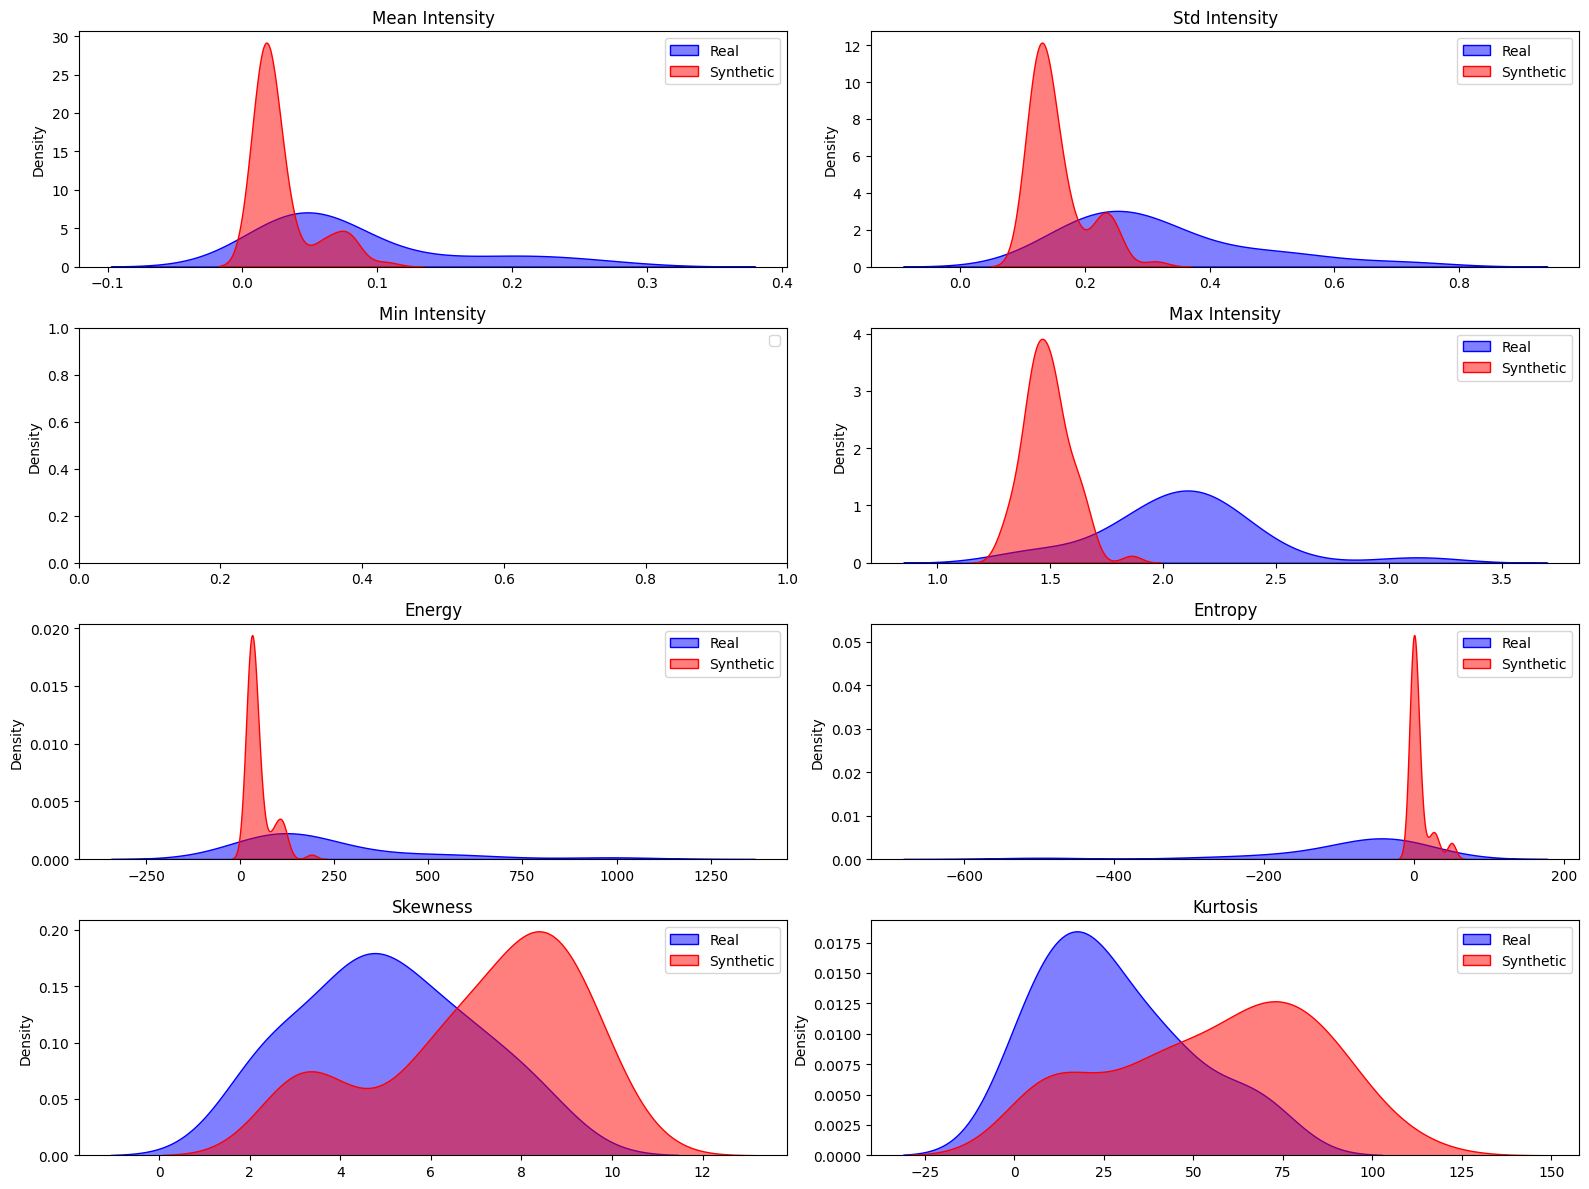

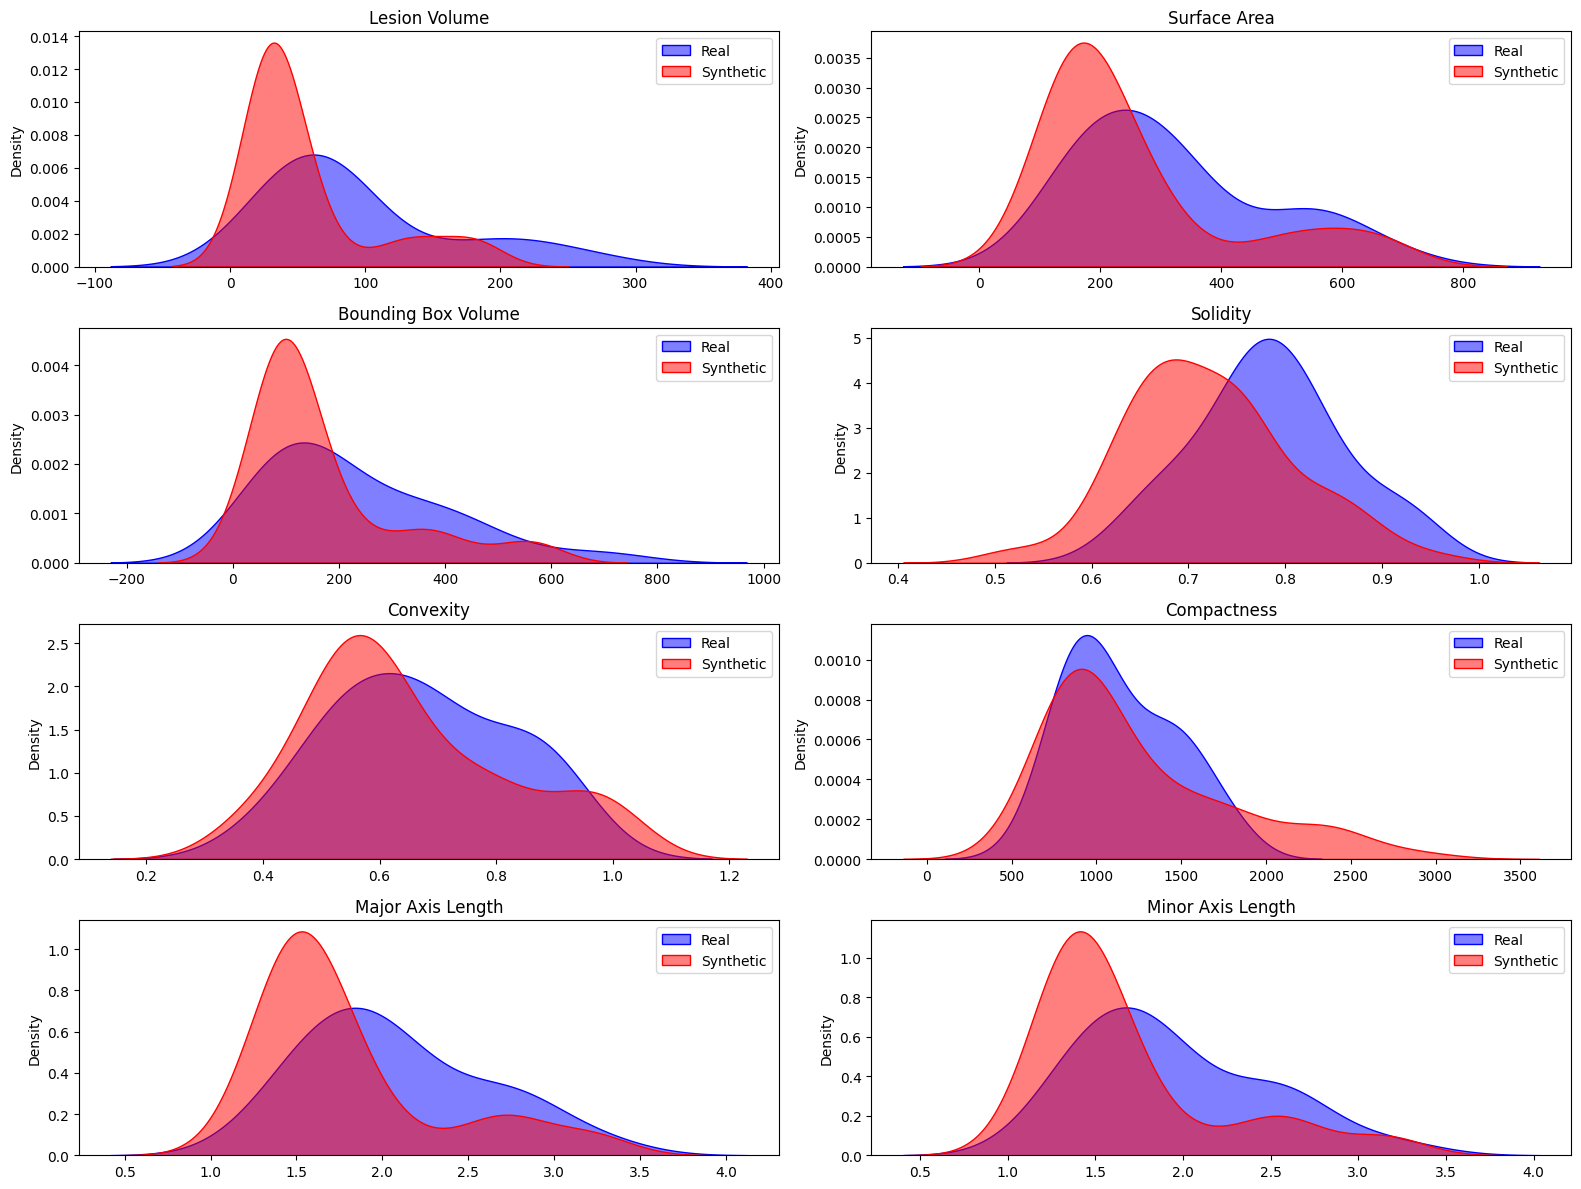

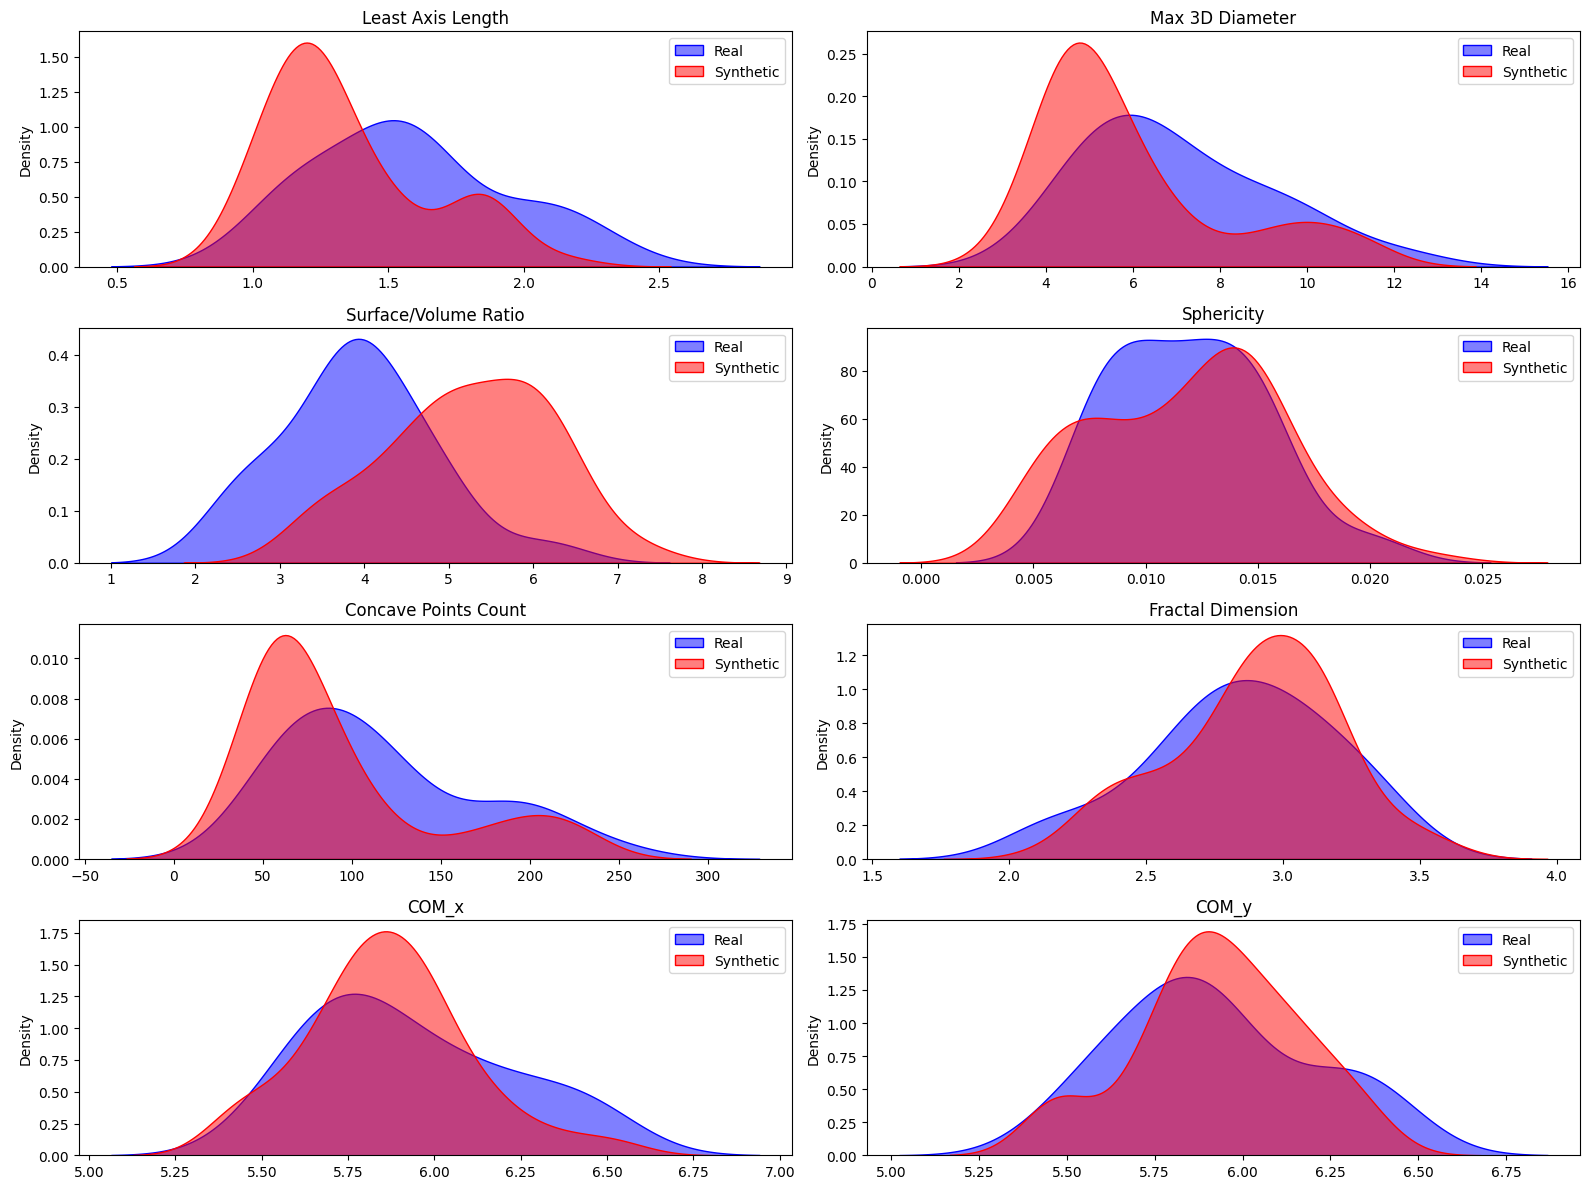

C:\Users\r106186\AppData\Local\Temp\2\ipykernel_6404\2379265779.py:456: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(synthetic_features[:, feature_idx], label="Synthetic", ax=ax, fill=True, color="red", alpha=0.5)


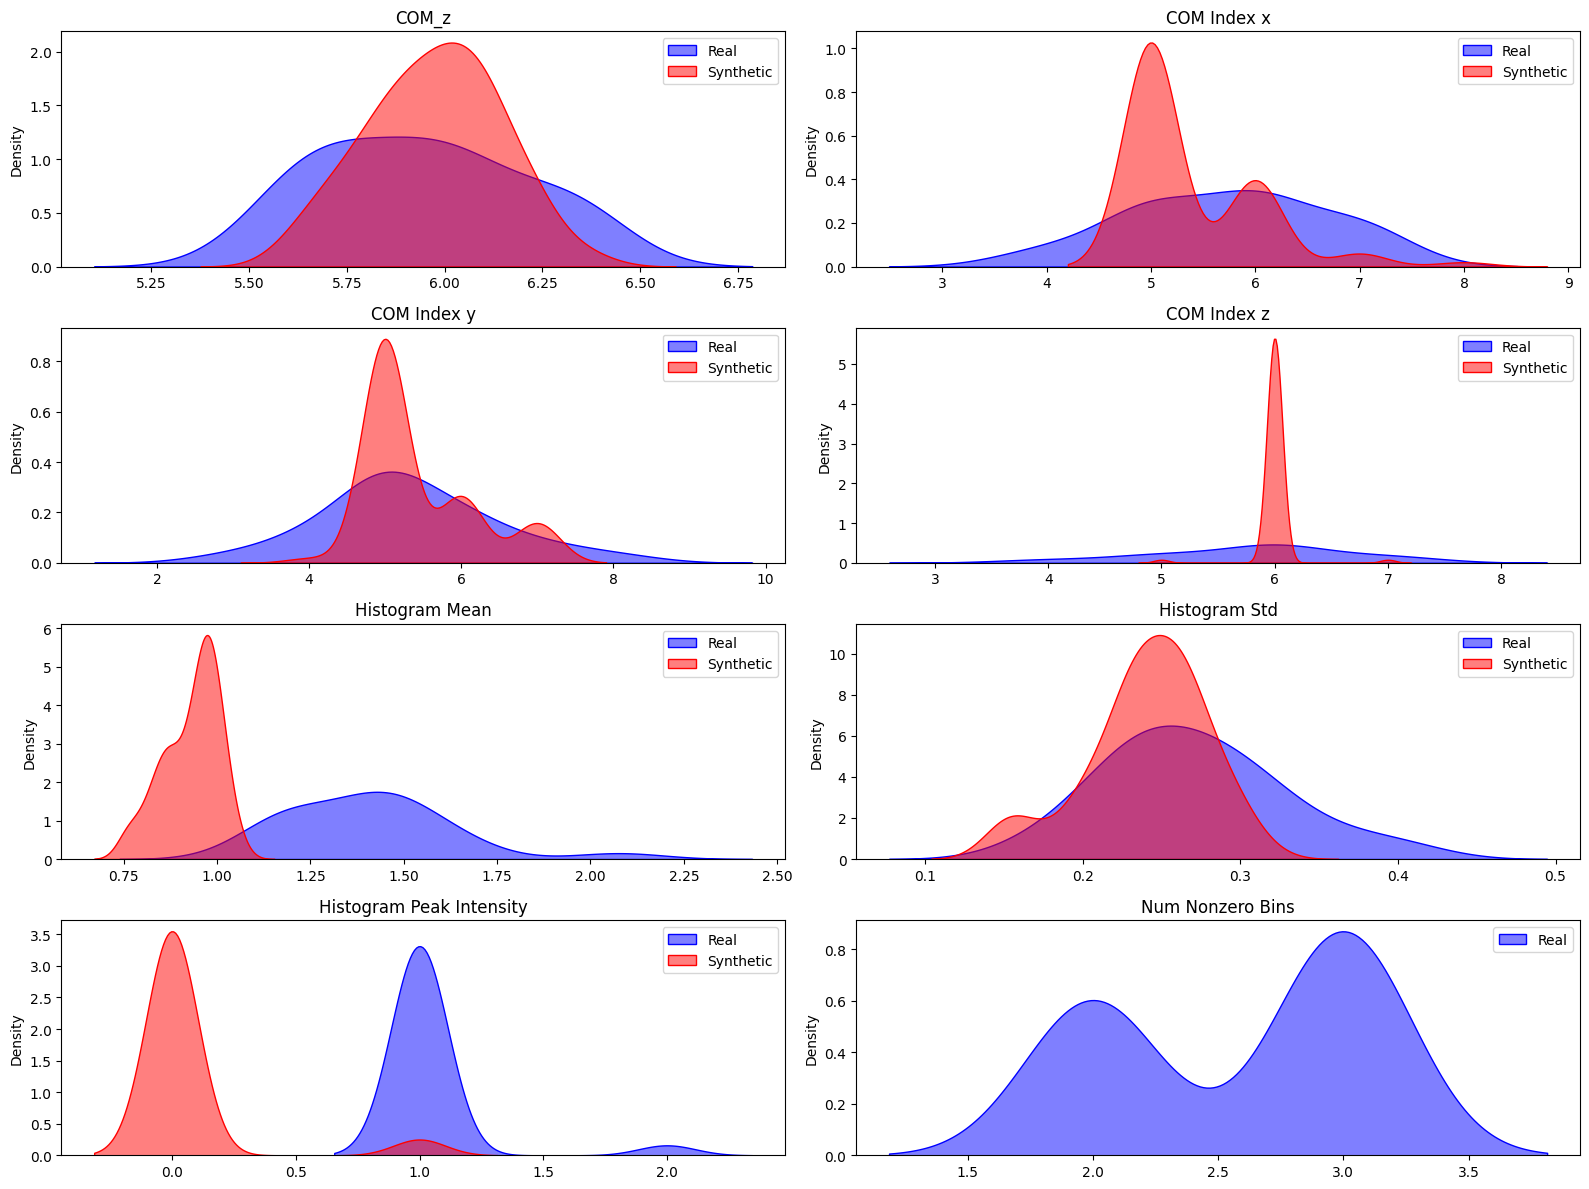

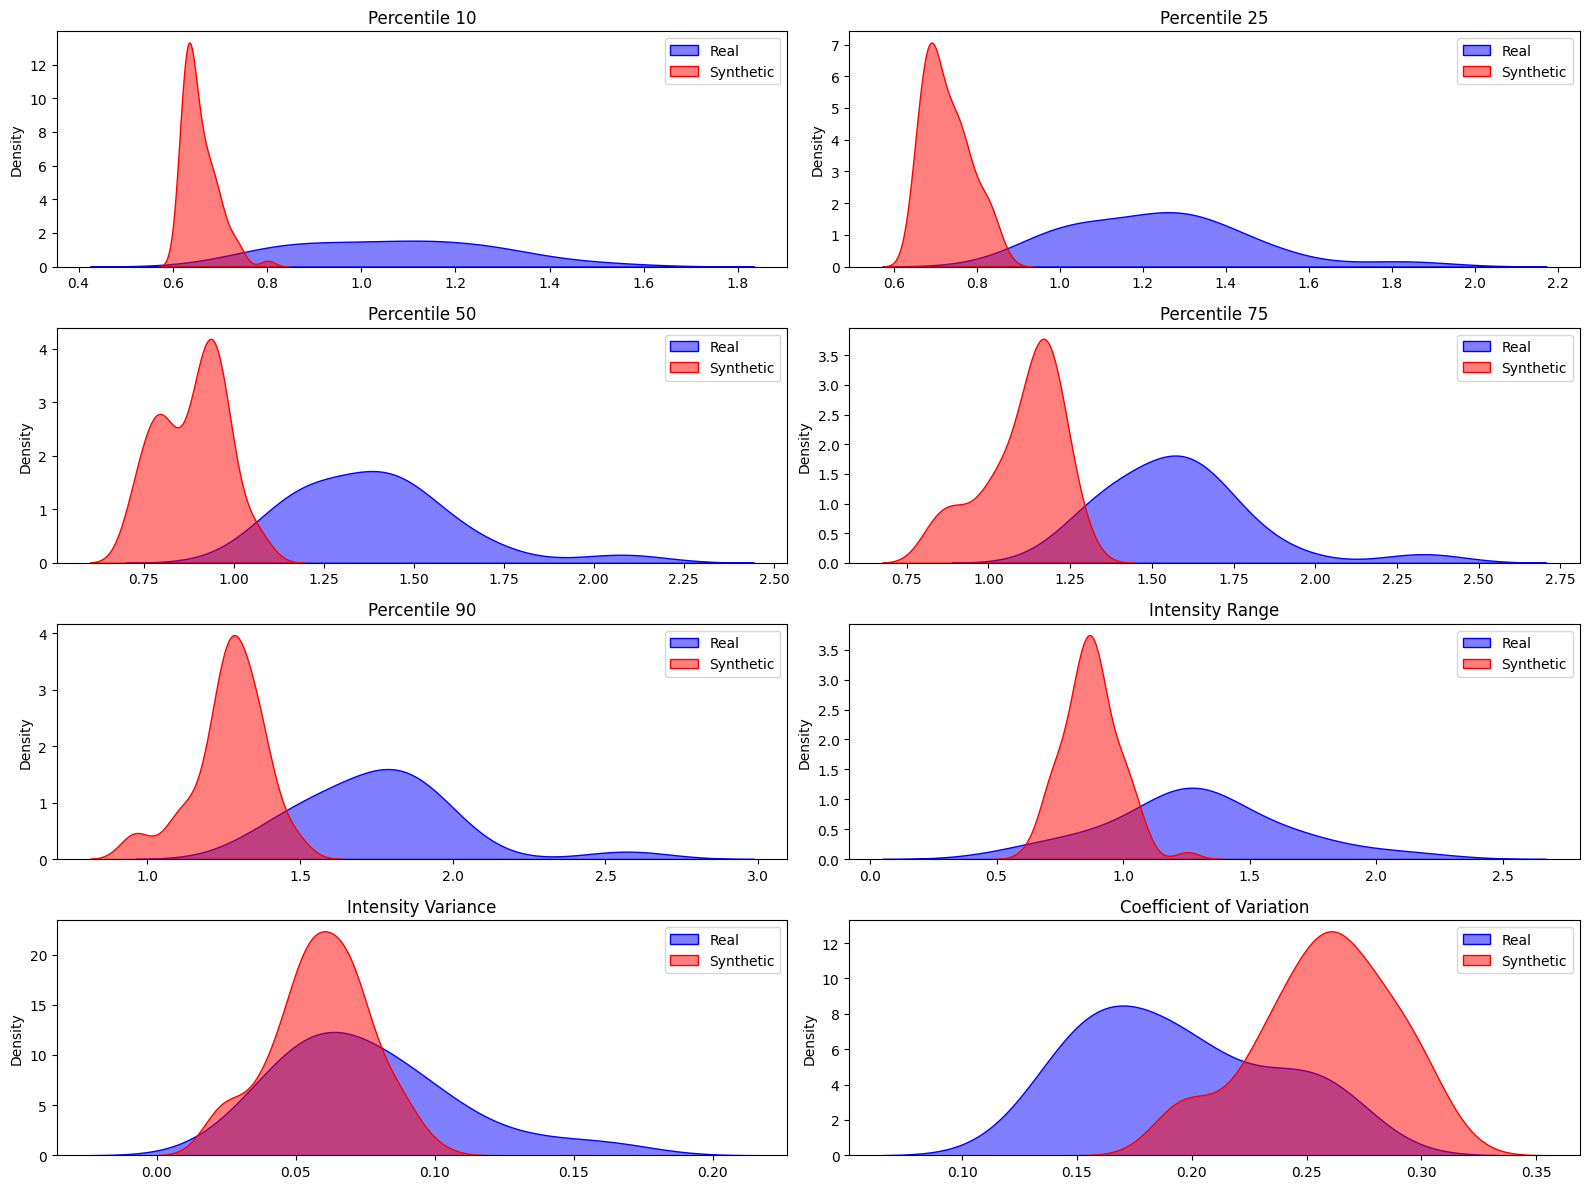

C:\Users\r106186\AppData\Local\Temp\2\ipykernel_6404\2379265779.py:455: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(real_features[:, feature_idx], label="Real", ax=ax, fill=True, color="blue", alpha=0.5)
C:\Users\r106186\AppData\Local\Temp\2\ipykernel_6404\2379265779.py:456: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(synthetic_features[:, feature_idx], label="Synthetic", ax=ax, fill=True, color="red", alpha=0.5)
C:\Users\r106186\AppData\Local\Temp\2\ipykernel_6404\2379265779.py:458: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


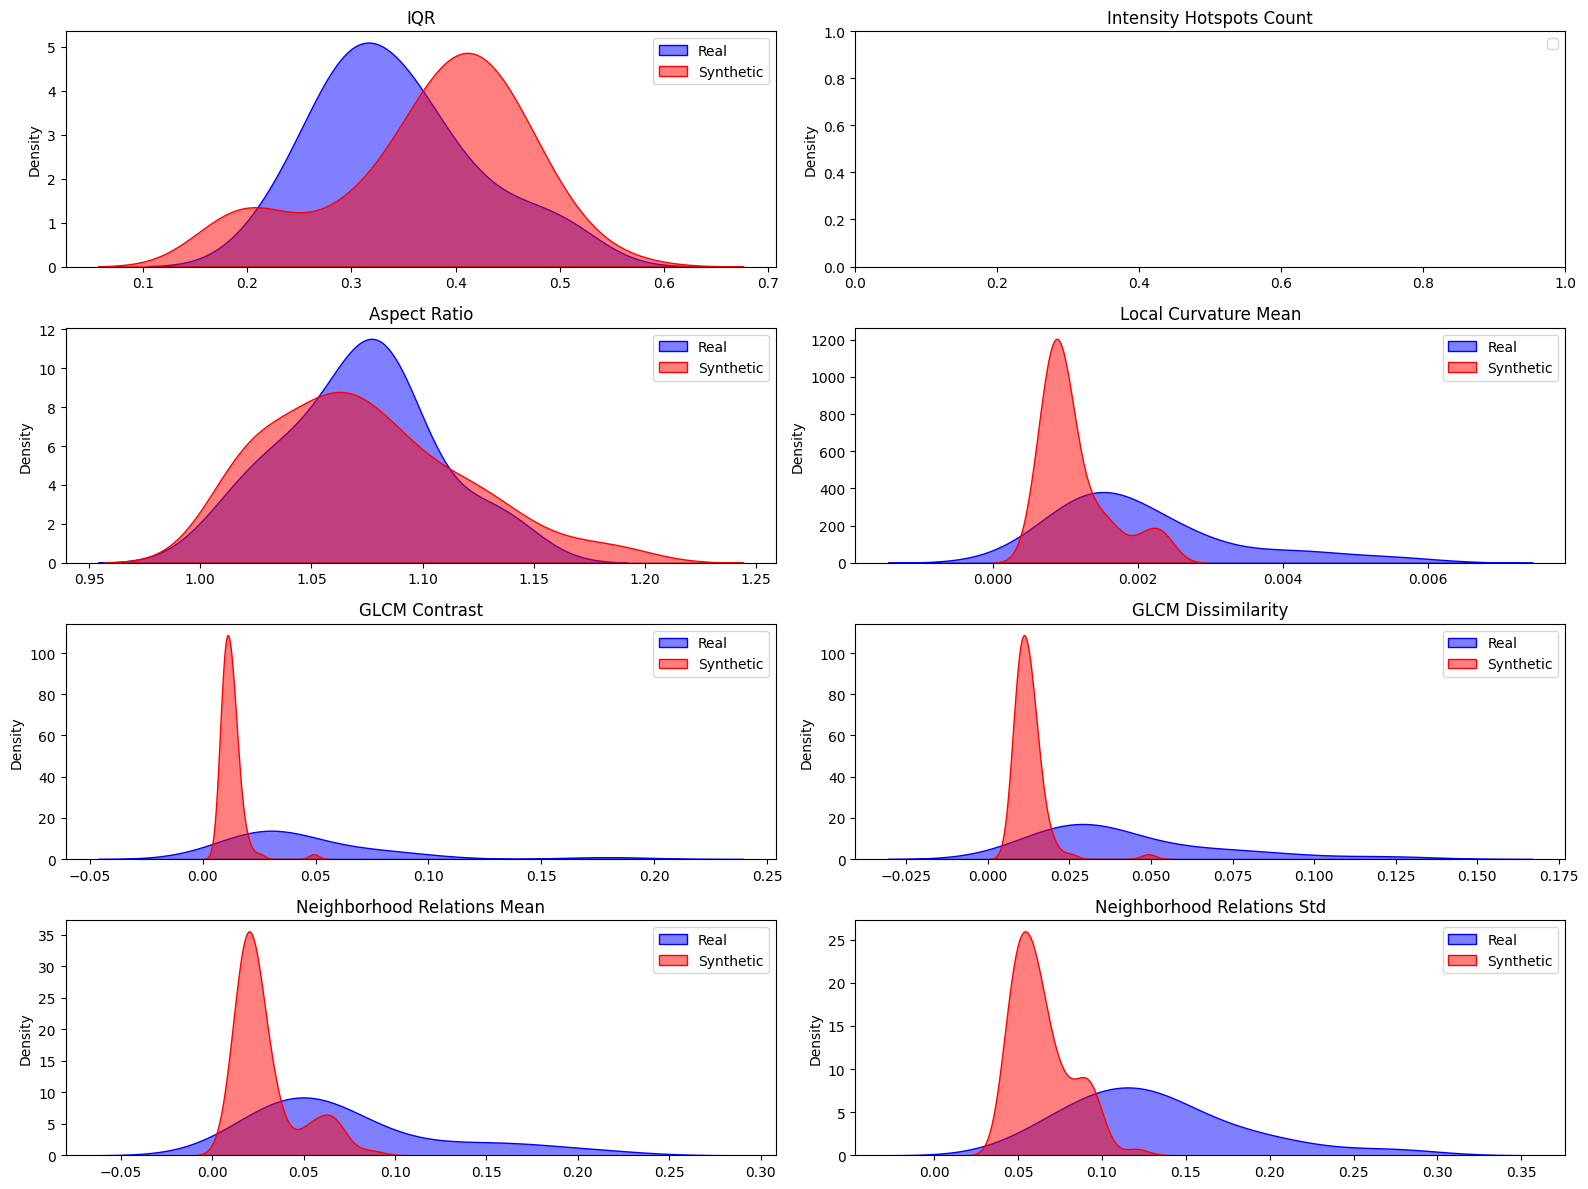

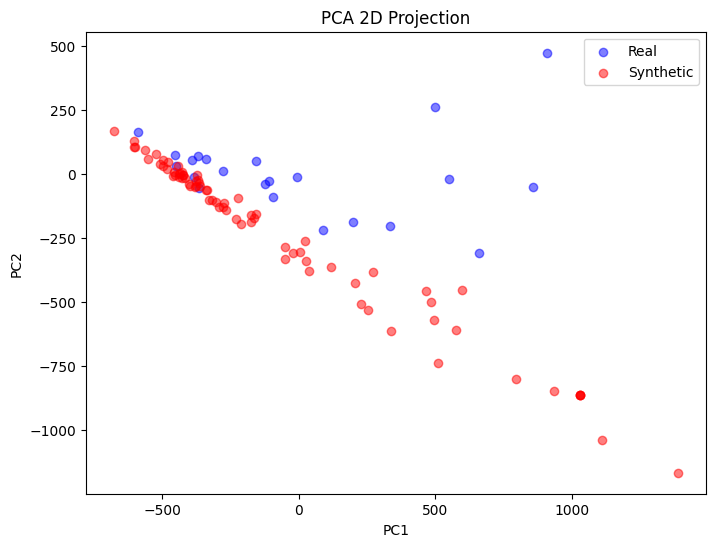

C:\Users\r106186\AppData\Local\Temp\2\ipykernel_6404\2379265779.py:481: RuntimeWarning: invalid value encountered in scalar divide
  effect_size = np.abs(np.mean(real_features[:, i]) - np.mean(synthetic_features[:, i])) / np.std(real_features[:, i])
c:\Users\r106186\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Mean Intensity: Significant difference (p = 0.0020, Effect size = 0.77, KS = 0.58, WD = 0.05)
Std Intensity: Significant difference (p = 0.0000, Effect size = 1.14, KS = 0.68, WD = 0.16)
Max Intensity: Significant difference (p = 0.0000, Effect size = 1.72, KS = 0.90, WD = 0.60)
Energy: Significant difference (p = 0.0018, Effect size = 0.78, KS = 0.68, WD = 178.77)
Entropy: Significant difference (p = 0.0008, Effect size = 0.85, KS = 1.00, WD = 95.22)
Skewness: Significant difference (p = 0.0001, Effect size = 1.10, KS = 0.47, WD = 2.05)
Kurtosis: Significant difference (p = 0.0000, Effect size = 1.39, KS = 0.48, WD = 27.98)
Lesion Volume: Significant difference (p = 0.0219, Effect size = 0.57, KS = 0.44, WD = 38.86)
Solidity: Significant difference (p = 0.0024, Effect size = 0.83, KS = 0.42, WD = 0.06)
Major Axis Length: Significant difference (p = 0.0313, Effect size = 0.56, KS = 0.41, WD = 0.30)
Minor Axis Length: Significant difference (p = 0.0392, Effect size = 0.53, KS = 0.44, WD

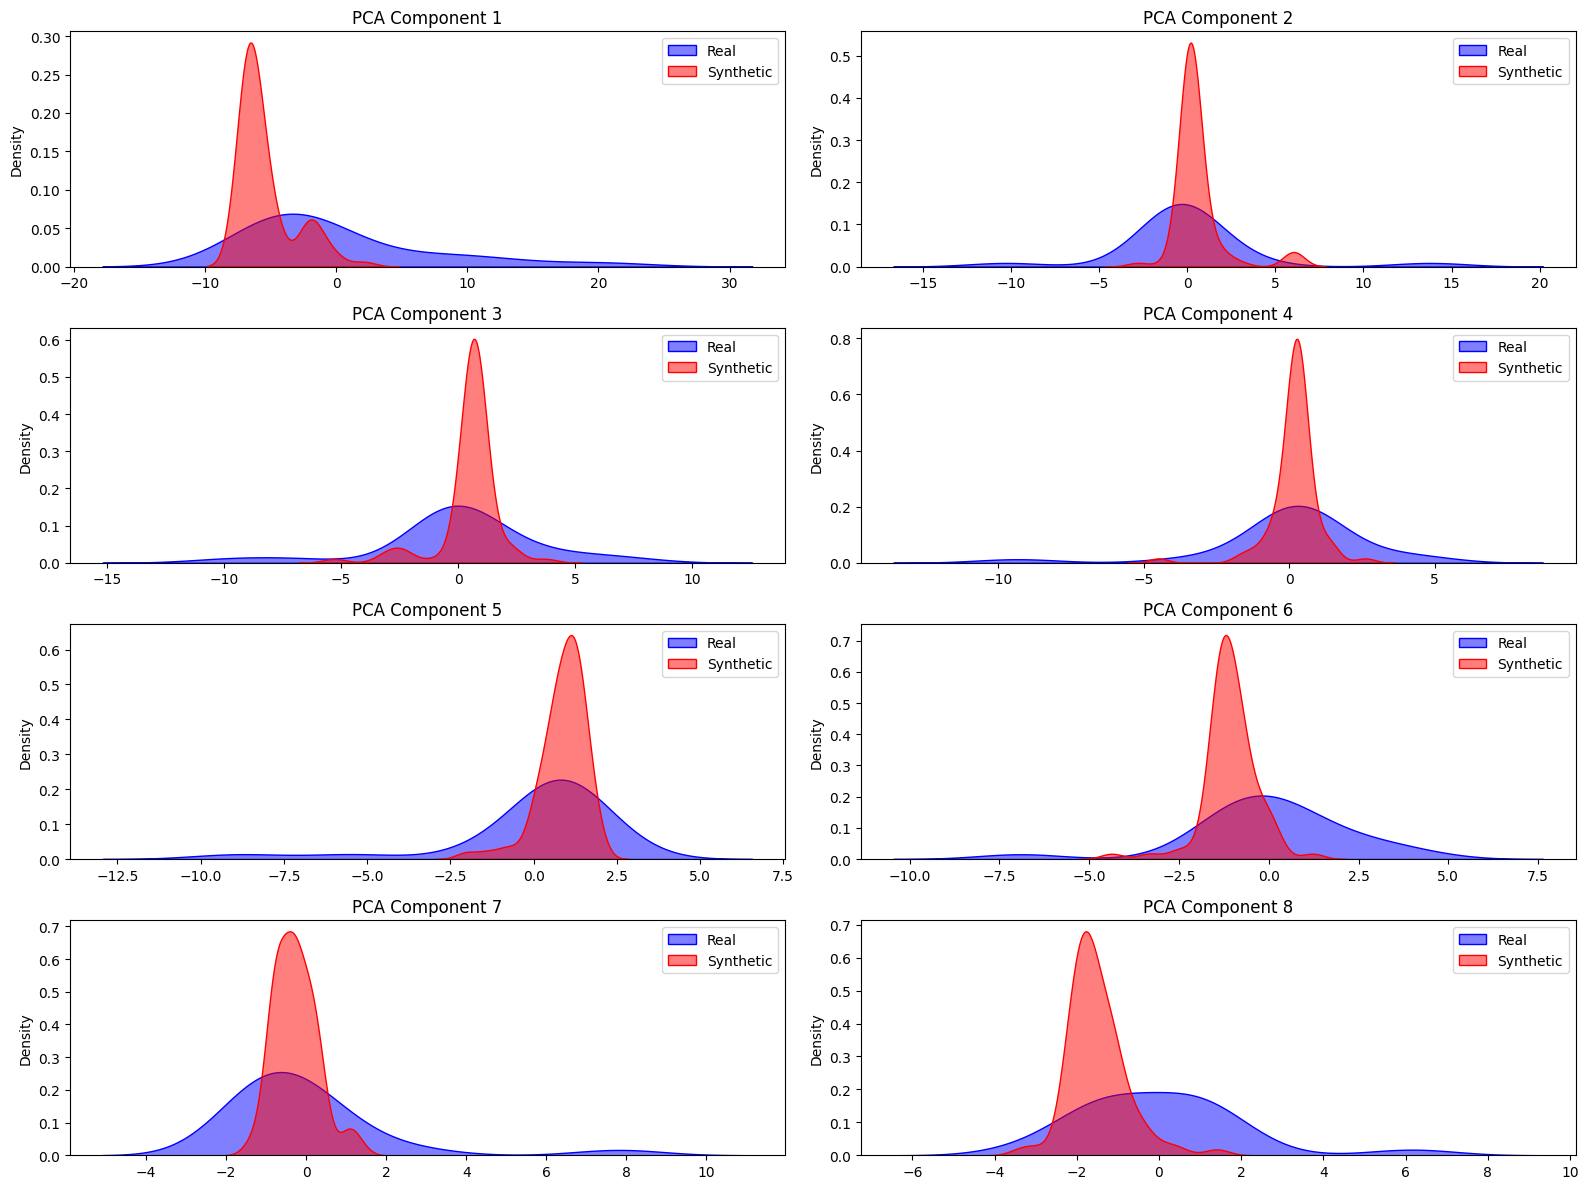

In [3]:
# 10. Compare radiomics and PCA feature distributions of real and mock lesions
# =================================================================================


import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import label, regionprops, marching_cubes
from scipy.ndimage import binary_erosion, center_of_mass, gaussian_gradient_magnitude, gaussian_filter
from scipy.spatial import ConvexHull, distance
from skimage.measure import find_contours
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def create_spherical_lesion(voxel_count=50, shape=(12,12,12)):
    lesion = np.zeros(shape, dtype=np.float32)
    
    radius = int(((3 * voxel_count) / (4 * np.pi)) ** (1/3))
    center = np.array(shape) // 2
    z, y, x = np.indices(shape)
    sphere = (x - center[1])**2 + (y - center[0])**2 + (z - center[2])**2 <= radius**2
    lesion[sphere] = 1.0
    return lesion

def extract_features_from_lesion(lesion):
    first_order_features = extract_first_order_features(lesion)
    shape_features = extract_shape_features(lesion)
    orientation_features = extract_orientation_features(lesion)
    intensity_features = extract_intensity_features(lesion)
    
    # New features
    mesh_verts, mesh_faces = create_mesh(lesion > 0)
    local_curvature_mean, local_curvature_std = compute_principal_curvature(lesion)
    spatial_correlation = calculate_spatial_correlation(lesion)
    neighborhood_relations_mean, neighborhood_relations_std = calculate_neighborhood_intensity_relations(lesion)
    glcm_contrast, glcm_dissimilarity = extract_glcm_features(lesion)
    lbp_hist = extract_lbp_features(lesion)
    aspect_ratio = calculate_aspect_ratio(shape_features)

    # Combine all features into one flattened array
    features = np.array([
        # First order features
        first_order_features['mean_intensity'],
        first_order_features['std_intensity'],
        first_order_features['min_intensity'],
        first_order_features['max_intensity'],
        first_order_features['energy'],
        first_order_features['entropy'],
        first_order_features['skewness'],
        first_order_features['kurtosis'],

        # Shape features
        shape_features['lesion_volume'],
        shape_features['surface_area'],
        shape_features['bounding_box_volume'],
        shape_features['solidity'],
        shape_features['convexity'],
        shape_features['compactness'],
        shape_features['major_axis_length'],
        shape_features['minor_axis_length'],
        shape_features['least_axis_length'],
        shape_features['max_3D_diameter'],
        shape_features['surface_volume_ratio'],
        shape_features['sphericity'],
        shape_features['concave_points_count'],
        shape_features['fractal_dimension'],
        
        # Orientation features
        orientation_features['COM_x'],
        orientation_features['COM_y'],
        orientation_features['COM_z'],
        orientation_features['COM_index_x'],
        orientation_features['COM_index_y'],
        orientation_features['COM_index_z'],

        # Intensity features
        intensity_features['hist_mean'],
        intensity_features['hist_std'],
        intensity_features['hist_peak_intensity'],
        intensity_features['num_nonzero_bins'],
        intensity_features['percentile_10'],
        intensity_features['percentile_25'],
        intensity_features['percentile_50'],
        intensity_features['percentile_75'],
        intensity_features['percentile_90'],
        intensity_features['intensity_range'],
        intensity_features['intensity_variance'],
        intensity_features['coefficient_of_variation'],
        intensity_features['IQR'],
        intensity_features['intensity_hotspots_count'],

        # New features
        aspect_ratio,
        local_curvature_mean,
        glcm_contrast,
        glcm_dissimilarity,
        neighborhood_relations_mean,
        neighborhood_relations_std
    ])
    
    return features

def extract_first_order_features(lesion):
    features = {
        'mean_intensity': np.mean(lesion),
        'std_intensity': np.std(lesion),
        'min_intensity': np.min(lesion),
        'max_intensity': np.max(lesion),
        'energy': np.sum(lesion ** 2),
        'entropy': -np.sum(lesion * np.log2(lesion + 1e-10)),
        'skewness': (np.mean((lesion - np.mean(lesion)) ** 3) / (np.std(lesion) ** 3)) if np.std(lesion) > 0 else 0,
        'kurtosis': (np.mean((lesion - np.mean(lesion)) ** 4) / (np.std(lesion) ** 4) - 3) if np.std(lesion) > 0 else 0,
    }
    return features

def extract_shape_features(lesion):
    features = {}
    binary_lesion = lesion > 0
    labeled_lesion = label(binary_lesion)
    props = regionprops(labeled_lesion)

    if props:
        lesion_prop = props[0]  
        features['lesion_volume'] = lesion_prop.area
        features['surface_area'] = calculate_surface_area(binary_lesion)
        features['bounding_box_volume'] = np.prod(np.array(lesion_prop.bbox[3:]) - np.array(lesion_prop.bbox[:3]))
        features['solidity'] = lesion_prop.solidity if np.isfinite(lesion_prop.solidity) else 0
        features['convexity'] = calculate_convexity(binary_lesion)
        features['compactness'] = calculate_compactness(binary_lesion)

        # Extract eigenvalues and compute lengths with safeguards
        if lesion_prop.inertia_tensor_eigvals is not None:
            ev = lesion_prop.inertia_tensor_eigvals
            features['major_axis_length'] = np.sqrt(ev[0]) if ev[0] > 0 else 0
            features['minor_axis_length'] = np.sqrt(ev[1]) if ev[1] > 0 else 0
            features['least_axis_length'] = np.sqrt(ev[2]) if ev[2] > 0 else 0
        else:
            features['major_axis_length'] = features['minor_axis_length'] = features['least_axis_length'] = 0

        features['max_3D_diameter'] = calculate_max_3D_diameter(binary_lesion)
        features['surface_volume_ratio'] = features['surface_area'] / features['lesion_volume'] if features['lesion_volume'] > 0 else 0
        features['sphericity'] = calculate_sphericity(binary_lesion)
        features['concave_points_count'] = detect_concave_points(binary_lesion)
        features['fractal_dimension'] = calculate_fractal_dimension(binary_lesion)
    else:
        # Set safe default values for all features if no properties were found
        features = {key: 0 for key in [
            'lesion_volume', 'surface_area', 'solidity', 'convexity', 'compactness',
            'major_axis_length', 'minor_axis_length', 'least_axis_length',
            'max_3D_diameter', 'surface_volume_ratio', 'sphericity', 'concave_points_count',
            'fractal_dimension'
        ]}
    
    return features

def calculate_fractal_dimension(binary_lesion):
    sizes = np.arange(1, min(binary_lesion.shape) // 2, 2)  # Box sizes
    counts = []
    
    for size in sizes:
        count = np.sum(binary_lesion[::size, ::size, ::size])  # Count filled boxes
        counts.append(count)

    counts = np.array(counts)
    
    # Filter out sizes that resulted in zero counts
    valid_sizes = sizes[counts > 0]
    valid_counts = counts[counts > 0]

    # Avoid computing if there are no valid counts
    if len(valid_counts) < 2:  # Need at least two points to fit
        return np.nan  # or some other fallback value like 0 or -1

    log_sizes = np.log(valid_sizes)
    log_counts = np.log(valid_counts)

    coeffs = np.polyfit(log_sizes, log_counts, 1)
    return -coeffs[0] if np.isfinite(-coeffs[0]) else 0

def extract_orientation_features(lesion):
    features = {}
    com = center_of_mass(lesion)
    com_index = np.unravel_index(np.argmax(lesion), lesion.shape)

    features['COM_x'] = com[0]
    features['COM_y'] = com[1]
    features['COM_z'] = com[2]
    
    features['COM_index_x'] = com_index[0]
    features['COM_index_y'] = com_index[1]
    features['COM_index_z'] = com_index[2]
    
    return features

def extract_intensity_features(lesion):
    features = {}
    intensity_values = lesion.flatten()
    intensity_values = intensity_values[intensity_values > 0]
    
    hist, bin_edges = np.histogram(intensity_values, bins=256, range=(0, 255))
    normalized_hist = hist / np.sum(hist)  
    
    features['hist_mean'] = np.mean(intensity_values)
    features['hist_std'] = np.std(intensity_values)
    features['hist_peak_intensity'] = np.argmax(hist)
    features['num_nonzero_bins'] = np.count_nonzero(hist)

    features['percentile_10'] = np.percentile(intensity_values, 10)
    features['percentile_25'] = np.percentile(intensity_values, 25)
    features['percentile_50'] = np.percentile(intensity_values, 50)  
    features['percentile_75'] = np.percentile(intensity_values, 75)
    features['percentile_90'] = np.percentile(intensity_values, 90)

    features['intensity_range'] = np.max(intensity_values) - np.min(intensity_values)
    features['intensity_variance'] = np.var(intensity_values)
    features['coefficient_of_variation'] = features['hist_std'] / features['hist_mean'] if features['hist_mean'] != 0 else 0
    features['IQR'] = features['percentile_75'] - features['percentile_25']
    features['intensity_hotspots_count'], features['intensity_hotspots'] = find_intensity_hotspots(lesion)

    weighted_com = weighted_center_of_mass(lesion)
    features['weighted_COM_x'] = weighted_com[0]
    features['weighted_COM_y'] = weighted_com[1]
    features['weighted_COM_z'] = weighted_com[2]

    return features

def calculate_surface_area(binary_lesion):
    verts, faces, _, _ = marching_cubes(binary_lesion)
    surface_area = len(faces)  # Each face contributes to surface area
    return surface_area

def calculate_convexity(binary_lesion):
    convex_hull = ConvexHull(np.argwhere(binary_lesion))
    return convex_hull.volume / np.sum(binary_lesion) if np.sum(binary_lesion) > 0 else 0

def calculate_compactness(binary_lesion):
    volume = np.sum(binary_lesion)
    surface_area = calculate_surface_area(binary_lesion)
    return (surface_area ** 2) / volume if volume > 0 else 0

def calculate_max_3D_diameter(binary_lesion):
    coords = np.argwhere(binary_lesion)
    max_distance = 0
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            dist = distance.euclidean(coords[i], coords[j])
            if dist > max_distance:
                max_distance = dist
    return max_distance

def calculate_sphericity(binary_lesion):
    volume = np.sum(binary_lesion)
    surface_area = calculate_surface_area(binary_lesion)
    return (4 * np.pi * volume) / (surface_area ** 2) if surface_area > 0 else 0

def detect_concave_points(binary_lesion):
    # Calculate concavity in 3D; use the local surface normals or curvature.
    # For simplicity, we will estimate the count by the number of contours found in each slice.
    concave_points_count = 0
    for i in range(binary_lesion.shape[0]):  # Iterate through each slice
        contours = find_contours(binary_lesion[i], 0.5)
        if contours:  # Check if any contours were found
            for contour in contours:
                concave_points_count += len(contour)  # Count the number of contour points in each slice
    return concave_points_count if concave_points_count > 0 else 0  # Return 0 if no concave points found

def find_intensity_hotspots(lesion, threshold=200):
    hotspots = np.where(lesion >= threshold)
    return len(hotspots[0]), hotspots

def weighted_center_of_mass(lesion):
    total_intensity = np.sum(lesion)
    if total_intensity == 0:
        return (0, 0, 0)
    
    weighted_sum_x = np.sum(np.arange(lesion.shape[0])[:, None, None] * lesion) 
    weighted_sum_y = np.sum(np.arange(lesion.shape[1])[None, :, None] * lesion) 
    weighted_sum_z = np.sum(np.arange(lesion.shape[2])[None, None, :] * lesion) 
    
    return (weighted_sum_x / total_intensity, weighted_sum_y / total_intensity, weighted_sum_z / total_intensity)

def create_mesh(binary_lesion):
    verts, faces, _, _ = marching_cubes(binary_lesion, level=0.5)
    return verts, faces

def compute_principal_curvature(lesion):
    # Smooth the lesion to reduce noise
    smooth_lesion = gaussian_filter(lesion, sigma=1)

    # Ensure the lesion matrix is cubic by padding if necessary
    max_dim = max(smooth_lesion.shape)
    pad_widths = [(0, max_dim - d) for d in smooth_lesion.shape]
    padded_lesion = np.pad(smooth_lesion, pad_width=pad_widths, mode='constant', constant_values=0)

    # Compute the gradients
    dz, dy, dx = np.gradient(padded_lesion)

    # Compute the second derivatives (Hessian)
    dxx = np.gradient(dx)[0]
    dyy = np.gradient(dy)[1]
    dzz = np.gradient(dz)[2]
    dxy = np.gradient(dx)[1]
    dxz = np.gradient(dx)[2]
    dyz = np.gradient(dy)[2]

    # Construct Hessian matrix (3x3 for each point)
    H = np.array([[dxx, dxy, dxz],
                  [dxy, dyy, dyz],
                  [dxz, dyz, dzz]])

    # Compute eigenvalues of Hessian for each voxel
    try:
        curvature_values = np.linalg.eigvalsh(H)
    except np.linalg.LinAlgError:
        return 0, 0  # Return 0 if there's an error in eigenvalue computation

    # Calculate mean and std of principal curvatures, with safeguards for math errors
    mean_curvature = np.mean(curvature_values) if np.isfinite(np.mean(curvature_values)) else 0
    std_curvature = np.std(curvature_values) if np.isfinite(np.std(curvature_values)) else 0

    return mean_curvature, std_curvature

def calculate_spatial_correlation(lesion):
    flattened = lesion.flatten()
    return np.corrcoef(flattened)

def calculate_neighborhood_intensity_relations(lesion):
    gradients = gaussian_gradient_magnitude(lesion, sigma=1)
    return np.mean(gradients), np.std(gradients)

def extract_glcm_features(lesion):
    contrast_list = []
    dissimilarity_list = []
    
    for i in range(lesion.shape[0]):  # Iterate through each slice in the 3D lesion
        slice_2d = lesion[i].astype(np.uint8)
        glcm = graycomatrix(slice_2d, distances=[1], angles=[0], symmetric=True, normed=True)
        contrast_list.append(graycoprops(glcm, 'contrast')[0, 0])
        dissimilarity_list.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    
    # Average the features across all slices
    return np.mean(contrast_list), np.mean(dissimilarity_list)

def extract_lbp_features(lesion):
    lbp_hist_list = []
    
    for i in range(lesion.shape[0]):  # Iterate through each slice in the 3D lesion
        slice_2d = lesion[i].astype(np.uint8)
        lbp = local_binary_pattern(slice_2d, P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp, bins=np.arange(0, 11), density=True)
        lbp_hist_list.append(hist)
    
    # Average the LBP histograms across all slices
    avg_lbp_hist = np.mean(lbp_hist_list, axis=0)
    return avg_lbp_hist

def calculate_aspect_ratio(shape_features):
    return shape_features['major_axis_length'] / shape_features['minor_axis_length'] if shape_features['minor_axis_length'] > 0 else 0

def calculate_local_curvature(binary_lesion):
    # Placeholder function; the implementation would depend on the specific algorithm chosen
    local_curvature = np.random.rand(np.sum(binary_lesion))  # Replace with actual curvature calculations
    return np.mean(local_curvature), np.std(local_curvature)

def plot_lesion_3d(lesion_array):
    """ Plot the extracted lesion in 3D with a colorbar. """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    nonzero_voxels = np.argwhere(lesion_array > 0)
    values = lesion_array[lesion_array > 0]
    
    sc = ax.scatter(nonzero_voxels[:, 0], nonzero_voxels[:, 1], nonzero_voxels[:, 2], 
                    c=values, cmap='hot', marker='o')
    ax.set_title('3D Visualization of Extracted Lesion')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 12)
    ax.set_zlim(0, 12)
    fig.colorbar(sc, ax=ax, label='Voxel Intensity')
    plt.show()



import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind, ks_2samp, wasserstein_distance

# Set paths
real_lesions_dir = r"\\cifs.research.erasmusmc.nl\nuge0001\MartijnB\NIFTI-images\ExtractedLesions"
synthetic_lesions_dir = r"\\cifs.research.erasmusmc.nl\nuge0001\MartijnB\NIFTI-images\MockLesions"

# Feature names
feature_names = [
    "Mean Intensity", "Std Intensity", "Min Intensity", "Max Intensity", "Energy", "Entropy", "Skewness", "Kurtosis",
    "Lesion Volume", "Surface Area", "Bounding Box Volume", "Solidity", "Convexity", "Compactness",
    "Major Axis Length", "Minor Axis Length", "Least Axis Length", "Max 3D Diameter", "Surface/Volume Ratio",
    "Sphericity", "Concave Points Count", "Fractal Dimension",
    "COM_x", "COM_y", "COM_z", "COM Index x", "COM Index y", "COM Index z",
    "Histogram Mean", "Histogram Std", "Histogram Peak Intensity", "Num Nonzero Bins",
    "Percentile 10", "Percentile 25", "Percentile 50", "Percentile 75", "Percentile 90",
    "Intensity Range", "Intensity Variance", "Coefficient of Variation", "IQR", "Intensity Hotspots Count",
    "Aspect Ratio", "Local Curvature Mean", "GLCM Contrast", "GLCM Dissimilarity",
    "Neighborhood Relations Mean", "Neighborhood Relations Std"
]

def load_lesion_features(directory):
    features = []
    for file in os.listdir(directory):
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            img = nib.load(os.path.join(directory, file))
            img_data = img.get_fdata()
            feature_vector = extract_features_from_lesion(img_data)  # Your function
            features.append(feature_vector)
    return np.array(features)

# Load features
real_features = load_lesion_features(real_lesions_dir)
synthetic_features = load_lesion_features(synthetic_lesions_dir)

# Check dataset sizes
print(f"Real lesions: {real_features.shape[0]}, Synthetic lesions: {synthetic_features.shape[0]}")

# Reduce dimensionality for visualization
pca = PCA(n_components=3)
real_pca = pca.fit_transform(real_features)
synthetic_pca = pca.transform(synthetic_features)

# Adjust perplexity dynamically for t-SNE
tsne_perplexity = min(30, min(real_features.shape[0], synthetic_features.shape[0]) - 1)
tsne = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=42)
real_tsne = tsne.fit_transform(real_features)
synthetic_tsne = tsne.fit_transform(synthetic_features)
# Create KDE plots for each feature divided over 6 figures (8 features per figure)
num_features = real_features.shape[1]
features_per_figure = 8
num_figures = (num_features + features_per_figure - 1) // features_per_figure  # Round up

for fig_idx in range(num_figures):
    fig, axes = plt.subplots(4, 2, figsize=(16, 12))  # 4 rows, 2 columns
    start_idx = fig_idx * features_per_figure
    end_idx = min(start_idx + features_per_figure, num_features)

    for i, ax in enumerate(axes.flat):
        feature_idx = start_idx + i
        if feature_idx >= num_features:
            ax.axis("off")
            continue
        sns.kdeplot(real_features[:, feature_idx], label="Real", ax=ax, fill=True, color="blue", alpha=0.5)
        sns.kdeplot(synthetic_features[:, feature_idx], label="Synthetic", ax=ax, fill=True, color="red", alpha=0.5)
        ax.set_title(f"{feature_names[feature_idx]}")
        ax.legend()

    plt.tight_layout()
    plt.show()


# PCA 2D scatter
plt.figure(figsize=(8, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real', alpha=0.5, color='blue')
plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], label='Synthetic', alpha=0.5, color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA 2D Projection')
plt.show()

# Compute statistical differences
p_values = []
effect_sizes = []
ks_results = []
wasserstein_results = []
for i in range(real_features.shape[1]):
    t_stat, p_val = ttest_ind(real_features[:, i], synthetic_features[:, i], equal_var=False)
    effect_size = np.abs(np.mean(real_features[:, i]) - np.mean(synthetic_features[:, i])) / np.std(real_features[:, i])
    ks_stat, ks_p = ks_2samp(real_features[:, i], synthetic_features[:, i])
    w_distance = wasserstein_distance(real_features[:, i], synthetic_features[:, i])
    
    p_values.append(p_val)
    effect_sizes.append(effect_size)
    ks_results.append(ks_stat)
    wasserstein_results.append(w_distance)

# Print significant differences
for i, p_val in enumerate(p_values):
    if p_val < 0.05:
        print(f"{feature_names[i]}: Significant difference (p = {p_val:.4f}, Effect size = {effect_sizes[i]:.2f}, KS = {ks_results[i]:.2f}, WD = {wasserstein_results[i]:.2f})")

print("Analysis complete! Check the plots and significance results.")

import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed PCA model
pca = joblib.load('//cifs.research.erasmusmc.nl/nuge0001/MartijnB/pca_model_real_lesions.joblib')

# Function to preprocess lesions into PCA-compatible shape
def preprocess_lesions(directory):
    lesions = []
    for file in os.listdir(directory):
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            img = nib.load(os.path.join(directory, file))
            img_data = img.get_fdata()

            # Flatten the lesion to match PCA input (12x12x12 = 1728)
            lesion_vector = img_data.flatten()
            lesions.append(lesion_vector)
    
    return np.array(lesions)

# Load and preprocess lesion data
real_lesions = preprocess_lesions(real_lesions_dir)
synthetic_lesions = preprocess_lesions(synthetic_lesions_dir)

# Transform the lesion data using the pre-trained PCA model
real_pca_transformed = pca.transform(real_lesions)
synthetic_pca_transformed = pca.transform(synthetic_lesions)

# Get number of PCA components
num_components = real_pca_transformed.shape[1]

# Plot PCA component distributions
fig, axes = plt.subplots(4, 2, figsize=(16, 12))  # 4 rows, 2 columns
for i, ax in enumerate(axes.flat):
    if i >= num_components:
        ax.axis("off")
        continue
    sns.kdeplot(real_pca_transformed[:, i], label="Real", ax=ax, fill=True, color="blue", alpha=0.5)
    sns.kdeplot(synthetic_pca_transformed[:, i], label="Synthetic", ax=ax, fill=True, color="red", alpha=0.5)
    ax.set_title(f"PCA Component {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()
